<a href="https://colab.research.google.com/github/subhani92/Deep_learning/blob/master/facial_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imporing libraries**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.2.0


In [3]:
!unzip -q '/content/drive/My Drive/deep_learning/786787_1351797_bundle_archive.zip'
!ls

drive  sample_data  test  train


# preprocessing data set:

In [ ]:
img_size = 48
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory("/content/train", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

test_generator = test_datagen.flow_from_directory("/content/test/", target_size = (img_size, img_size),
                                             color_mode = 'grayscale',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Building CNN

In [ ]:
def my_model():
  cnn = tf.keras.models.Sequential(
  tf.keras.layers.Conv2D(64, (5,5), padding ='same', activation='relu', input_shape=(48,48,1)))
  cnn.add(tf.keras.layers.Conv2D(64, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())

  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

  #,kernel_regularizer = tf.keras.regularizers.l2(0.01)cnn.add(tf.keras.layers.Dropout(0.2))
  cnn.add(tf.keras.layers.Conv2D(128, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.Conv2D(128, (5,5),padding='same', activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  
  

  #adding more layers
  cnn.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
  cnn.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.Dropout(0.2))
  cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))



  cnn.add(tf.keras.layers.Flatten())
  cnn.add(tf.keras.layers.Dense(512))
  #cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  cnn.add(tf.keras.layers.BatchNormalization())
  cnn.add(tf.keras.layers.Activation('relu'))
  cnn.add(tf.keras.layers.Dropout(0.25))
  cnn.add(tf.keras.layers.Dense(7))
  cnn.add(tf.keras.layers.Activation('softmax'))

  return cnn


# compile and fit the model


In [ ]:
model = my_model()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_51 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_52 (Batc (None, 24, 24, 128)     

In [ ]:
print(train_generator.n)
batch_size = 64
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
print(steps_per_epoch)
print(validation_steps)

28709
448
112


In [ ]:
optm=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)
optm1= tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
# Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(optimizer=optm1,
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_51 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_52 (Batc (None, 24, 24, 128)     

# Try Another Model MibileNet

In [33]:
import re
import gc
import glob
import keras
import pandas as pd
import numpy  as np

import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix


import keras.backend as K
from keras.models     import Sequential
from keras.layers     import Dense, Dropout, GlobalMaxPooling2D
from keras.optimizers import Adam, SGD
from keras.applications import MobileNetV2
from keras.callbacks    import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(451)

# General parameters
batch_size = 64
img_size = 48
epochs     = 50



train_generator = ImageDataGenerator(
                    rescale     = 1./255,
                    shear_range = 0.1,
                    zoom_range  = 0.1,
                    width_shift_range  = 0.1,
                    height_shift_range = 0.1,
                    horizontal_flip    = True)

test_generator = ImageDataGenerator(rescale=1./255)



In [34]:


train_gen = train_generator.flow_from_directory("/content/train",
                                               
                                             target_size=(48,48),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                              seed=451)

test_gen = test_generator.flow_from_directory("/content/test/", 
                                              target_size=(48,48),
                                             color_mode = 'rgb',
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             shuffle = True,
                                              seed=451)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [35]:

model = Sequential()
model.add(MobileNetV2(input_shape=(48,48,3), weights='imagenet', include_top=False))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning:

`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 1280)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 2,232,839
Non-trainable params: 34,112
_________________________________________________________________


In [37]:
another_model = model.fit(train_gen,
                steps_per_epoch=28709 // batch_size,
                epochs = 30,
                validation_data=test_gen,
                validation_steps=7178 // batch_size)

Epoch 1/30
448/448 [==============================] - 79s 176ms/step - loss: 0.4761 - accuracy: 0.8355 - val_loss: 0.4184 - val_accuracy: 0.8121
Epoch 2/30
448/448 [==============================] - 55s 124ms/step - loss: 0.3783 - accuracy: 0.8585 - val_loss: 0.5146 - val_accuracy: 0.8258
Epoch 3/30
448/448 [==============================] - 55s 124ms/step - loss: 0.3640 - accuracy: 0.8623 - val_loss: 0.3732 - val_accuracy: 0.8570
Epoch 4/30
448/448 [==============================] - 58s 129ms/step - loss: 0.3495 - accuracy: 0.8667 - val_loss: 0.3357 - val_accuracy: 0.8615
Epoch 5/30
448/448 [==============================] - 58s 130ms/step - loss: 0.3389 - accuracy: 0.8695 - val_loss: 0.3341 - val_accuracy: 0.8647
Epoch 6/30
448/448 [==============================] - 58s 129ms/step - loss: 0.3335 - accuracy: 0.8713 - val_loss: 0.4840 - val_accuracy: 0.8525
Epoch 7/30
448/448 [==============================] - 57s 128ms/step - loss: 0.3259 - accuracy: 0.8729 - val_loss: 0.3814 - val_ac

In [ ]:
model.save_weights('emotion_model_mobilenet2D.h5')
!ls

In [ ]:
#compile and fit the model
#cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,
        epochs = 30,
        batch_size=64,
        verbose=1,
        validation_data = test_generator,
        shuffle=True)

Epoch 1/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5850 - accuracy: 0.7857 - val_loss: 1.0767 - val_accuracy: 0.6630
Epoch 2/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5759 - accuracy: 0.7893 - val_loss: 1.1243 - val_accuracy: 0.6500
Epoch 3/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5599 - accuracy: 0.7961 - val_loss: 1.1111 - val_accuracy: 0.6629
Epoch 4/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5570 - accuracy: 0.7940 - val_loss: 1.1248 - val_accuracy: 0.6641
Epoch 5/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5421 - accuracy: 0.7984 - val_loss: 1.1495 - val_accuracy: 0.6456
Epoch 6/30
449/449 [==============================] - 20s 44ms/step - loss: 0.5319 - accuracy: 0.8035 - val_loss: 1.1394 - val_accuracy: 0.6608
Epoch 7/30
449/449 [==============================] - 19s 43ms/step - loss: 0.5246 - accuracy: 0.8072 - val_loss: 1.1360 - val_accuracy:

In [ ]:
#save the model weihgt
model.save_weights('emotion_model.h5')
!ls

ananya.jpg  emotion_model.h5  face2.jpg  face5.jpg    test
drive	    face1.jpg	      face4.jpg  sample_data  train


In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

[[1. 0. 0. 0. 0. 0. 0.]]
0


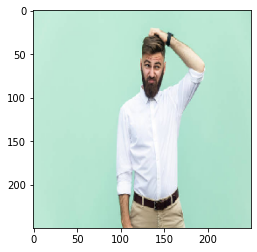

Expression Prediction: angry


In [ ]:
import keras
from skimage import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
img = keras.preprocessing.image.load_img(
    "/content/face6.jpg", color_mode='grayscale', target_size=(48,48)
)
show_img = keras.preprocessing.image.load_img(
    "/content/face6.jpg", color_mode='rgba', target_size=(250,250)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
maxindex = int(np.argmax(predictions)) 
print(maxindex)
score = predictions[0]
#print(int(np.argmax(score)))

#emotion_analysis(score)
plt.imshow(show_img)
plt.show()
      
print('Expression Prediction:',emotions[maxindex])
        